In [1]:
import pandas as pd
import numpy as np

# Load Data

In [2]:
df=pd.read_csv('UC_Sample Data.csv',encoding = "ISO-8859-1")

In [3]:
df

,Test Case ID,Test Run Id,Failed Steps,Exception Name,Execution Time for test step,Predecessor TestCase ID,Successor TestCase ID,RCA,Buckets Items
0,457,122,5.10,TimeoutException,2019-07-10 17:16:22.324,NaN,457.0,Thrown when there is not enough time for a com...,Automation Issue
1,457,122,5.70,"Verification Failed. Expected text: ""Manual Ha...",2019-07-10 17:16:22.532,457.0,457.0,This exception is due to accessing an element ...,Application Issue
2,457,122,5.80,"Verification Failed. Expected value: ""Name:'da...",2019-07-10 17:16:22.622,457.0,457.0,This exception is due to accessing an element ...,Application Issue
3,457,122,5.90,"Verification Failed. Expected text: ""Manual Ha...",2019-07-10 17:16:22.659,457.0,457.0,This exception is due to accessing an element ...,Automation Issue
4,457,122,6.10,TOO_MANY_ROWS Exception,2019-07-10 17:16:22.746,457.0,457.0,trying to SELECT or fetch more than one row in...,Data related Issue
...,...,...,...,...,...,...,...,...,...
245,341,122,10.11,Unable to find object with specified locator (...,2019-07-11 09:21:05.599,320.0,348.0,The Locator is not available,Automation Issue
246,348,122,10.11,UnableToCreateProfileException,2019-07-11 09:32:49.753,341.0,351.0,Can open a browser with certain options using ...,Automation Issue
247,351,122,3.60,Unable to find object with specified locator (...,2019-07-11 09:34:37.606,348.0,350.0,The Locator is not available,Automation Issue
248,350,122,10.11,InsecureCertificateException,2019-07-11 09:40:56.263,351.0,336.0,Navigation made the user agent to hit a certif...,Automation Issue


# EDA

[Text(0, 0, 'Automation Issue'),
 Text(0, 0, 'Application Issue'),
 Text(0, 0, 'Data related Issue'),
 Text(0, 0, 'Timing Exception'),
 Text(0, 0, 'Infrastrature Issue'),
 Text(0, 0, 'Timing Issue'),
 Text(0, 0, 'Latency related issue'),
 Text(0, 0, 'Environment Issue')]

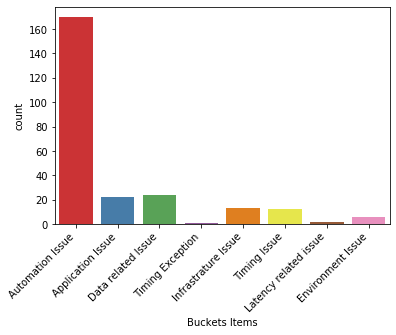

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=df,
    x='Buckets Items',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

#chart = sns.countplot(data=df3, x='RCA', palette='Set1')

#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [6]:
df['Buckets Items'].value_counts()

Automation Issue         170
Data related Issue        24
Application Issue         22
Infrastrature Issue       13
Timing Issue              12
Environment Issue          6
Latency related issue      2
Timing Exception           1
Name: Buckets Items, dtype: int64

In [7]:
df['Buckets Items'].isna().sum()

0

In [8]:
df['Buckets Items'].replace({"Environment Issue": "Application Issue","Timing Exception": "Application Issue", "Infrastrature Issue": "Data related Issue",
                     'Timing Issue' : 'Data related Issue', 'Latency related issue' : 'Application Issue' }, inplace=True)

In [8]:
df['Buckets Items'].value_counts()

Automation Issue      170
Data related Issue     49
Application Issue      31
Name: Buckets Items, dtype: int64

[Text(0, 0, 'Automation Issue'),
 Text(0, 0, 'Application Issue'),
 Text(0, 0, 'Data related Issue')]

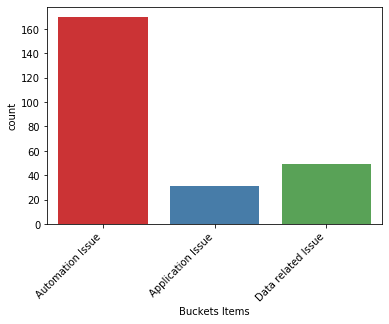

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=df,
    x='Buckets Items',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [10]:
df['Predecessor TestCase ID'].isna().sum()

1

In [11]:
df['Predecessor TestCase ID'].fillna(0, inplace=True)

In [12]:
df['Successor TestCase ID'].isna().sum()

1

In [13]:
df['Successor TestCase ID'].fillna(0, inplace=True)

# Preprocessing

In [14]:
#Update_date=[]
#for date in df['Step update date']:
#    period = pd.Period(date, freq='D')
#    Update_date.append(period.dayofyear)

#df['Step update date']=Update_date

In [15]:
import datetime as dt

In [16]:
#Converting the field type into Date and Time

df['Execution Time'] = pd.to_datetime(df['Execution Time for test step'])

In [17]:
df['Execution Time'].dt.hour.head()

0    17
1    17
2    17
3    17
4    17
Name: Execution Time, dtype: int64

In [18]:
#df['exe_day'] = df['Execution Time'].dt.dayofyear

In [19]:
#df['exe_month'] = df['Execution Time'].dt.month

In [20]:
df['exe_hour'] = df['Execution Time'].dt.hour

In [21]:
df['exe_min'] = df['Execution Time'].dt.minute

In [22]:
df['exe_sec'] = df['Execution Time'].dt.second

In [23]:
df.drop(columns = {'Execution Time for test step','Execution Time','RCA'}, inplace=True)

# Text Wrangling and Normalization

In [24]:
from bs4 import BeautifulSoup
import re
import tqdm
import unicodedata

In [25]:
#function defined to remove html tags from data

def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

In [26]:
#function defined to remove unicode data

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

In [27]:
# lower case and remove special characters\whitespaces

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    #doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    doc=re.sub('[0-9]', '', doc)
    norm_docs.append(doc)
  
  return norm_docs

In [28]:
df.dtypes

Test Case ID                 int64
Test Run Id                  int64
Failed Steps               float64
Exception Name              object
Predecessor TestCase ID    float64
Successor TestCase ID      float64
Buckets Items               object
exe_hour                     int64
exe_min                      int64
exe_sec                      int64
dtype: object

In [29]:
df['Exception Name'] = df['Exception Name'].astype('str')

In [30]:
#Data_Preprocessing

norm_df_exception = pre_process_corpus(df['Exception Name'])

100%|██████████| 250/250 [00:00<00:00, 4769.85it/s]


In [31]:
norm_df_exception[0]

'timeoutexception'

# CountVector Conversion

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1, 1), min_df=0.001, max_df=0.99)
cv_exception_matrix = cv.fit_transform(norm_df_exception)
cv_exception_matrix=cv_exception_matrix.toarray()

In [33]:

# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
data2=pd.DataFrame(cv_exception_matrix, columns=vocab)

In [34]:
data2

,acceptinsecurecerts,acceptsslcerts,accessible,add,airthematic,allow,amd,and,applicationcacheenabled,appropriate,...,web,webapplicationexceptionstring,webdriverexception,webstorageenabled,wedwsvmtxadu,while,windows,with,xp,xpathnamecustomer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.drop(columns={'Exception Name','Test Run Id'},inplace=True)

In [37]:
data3 = pd.concat([data2,df], axis=1)

In [38]:
data3

,acceptinsecurecerts,acceptsslcerts,accessible,add,airthematic,allow,amd,and,applicationcacheenabled,appropriate,...,xp,xpathnamecustomer,Test Case ID,Failed Steps,Predecessor TestCase ID,Successor TestCase ID,Buckets Items,exe_hour,exe_min,exe_sec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,457,5.10,0.0,457.0,Automation Issue,17,16,22
1,0,0,0,0,0,0,0,0,0,0,...,0,0,457,5.70,457.0,457.0,Application Issue,17,16,22
2,0,0,0,0,0,0,0,0,0,0,...,0,0,457,5.80,457.0,457.0,Application Issue,17,16,22
3,0,0,0,0,0,0,0,0,0,0,...,0,0,457,5.90,457.0,457.0,Automation Issue,17,16,22
4,0,0,0,0,0,0,0,0,0,0,...,0,0,457,6.10,457.0,457.0,Data related Issue,17,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,341,10.11,320.0,348.0,Automation Issue,9,21,5
246,0,0,0,0,0,0,0,0,0,0,...,0,0,348,10.11,341.0,351.0,Automation Issue,9,32,49
247,0,0,0,0,0,0,0,0,0,0,...,0,0,351,3.60,348.0,350.0,Automation Issue,9,34,37
248,0,0,0,0,0,0,0,0,0,0,...,0,0,350,10.11,351.0,336.0,Automation Issue,9,40,56


In [ ]:
#data3.drop(columns={'index','Execution_Time_for_test_case','Execution Time'},inplace=True)

In [39]:
data3 = data3.rename(columns={'Buckets Items' : 'Failure Reason'})

In [40]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data3['Failure Reason']= label_encoder.fit_transform(data3['Failure Reason'])

In [46]:
# from scipy import stats
# for column in data3:
#     pearson_coef, _ = stats.pearsonr(data3[column], data3["Failure Reason"])
#     print(column,':',pearson_coef)

# Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
Failure_Reason = data3['Failure Reason'].values
data4 = data3.drop(columns=['Failure Reason'])

In [43]:
data4

,acceptinsecurecerts,acceptsslcerts,accessible,add,airthematic,allow,amd,and,applicationcacheenabled,appropriate,...,with,xp,xpathnamecustomer,Test Case ID,Failed Steps,Predecessor TestCase ID,Successor TestCase ID,exe_hour,exe_min,exe_sec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,457,5.10,0.0,457.0,17,16,22
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,457,5.70,457.0,457.0,17,16,22
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,457,5.80,457.0,457.0,17,16,22
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,457,5.90,457.0,457.0,17,16,22
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,457,6.10,457.0,457.0,17,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,1,0,0,341,10.11,320.0,348.0,9,21,5
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,348,10.11,341.0,351.0,9,32,49
247,0,0,0,0,0,0,0,0,0,0,...,1,0,0,351,3.60,348.0,350.0,9,34,37
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,350,10.11,351.0,336.0,9,40,56


In [44]:
train_data, test_data, train_rca, test_rca = train_test_split(data4, Failure_Reason, test_size=0.2, random_state=42,stratify=Failure_Reason)

# Machine Learning Model - CV

In [45]:
# Random Forest model on BOW features
from sklearn.ensemble import RandomForestClassifier

# instantiate model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# train model
rf.fit(train_data, train_rca)

# predict on test data
rf_bow_predictions = rf.predict(test_data)

In [46]:
rf_bow_predictions

array([1, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1])

In [47]:
#Classification Report

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score, roc_curve


print(classification_report(test_rca, rf_bow_predictions))
pd.DataFrame(confusion_matrix(test_rca, rf_bow_predictions))

print('Accuracy Score is ', accuracy_score(test_rca, rf_bow_predictions ))


pd.DataFrame(confusion_matrix(test_rca, rf_bow_predictions))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.92      0.97      0.94        34
           2       1.00      0.90      0.95        10

    accuracy                           0.92        50
   macro avg       0.91      0.85      0.87        50
weighted avg       0.92      0.92      0.92        50

Accuracy Score is  0.92


,0,1,2
0,4,2,0
1,1,33,0
2,0,1,9


In [48]:
#using the naive byes build model with Count vectors
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(alpha=0.01)
clf.fit(train_data, train_rca)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [49]:
nbpred=clf.predict(test_data)

In [50]:
nbpred

array([1, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1])

In [51]:
print(classification_report(test_rca, nbpred))

print('Accuracy Score is', accuracy_score(test_rca, nbpred ))

pd.DataFrame(confusion_matrix(test_rca, nbpred))


              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.97      1.00      0.99        34
           2       0.90      0.90      0.90        10

    accuracy                           0.94        50
   macro avg       0.89      0.86      0.87        50
weighted avg       0.94      0.94      0.94        50

Accuracy Score is 0.94


,0,1,2
0,4,1,1
1,0,34,0
2,1,0,9


In [52]:
from sklearn import svm

In [63]:
svc = svm.SVC(kernel='poly',degree=5,max_iter=5)

In [64]:
svc.fit(train_data, train_rca)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
    kernel='poly', max_iter=5, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
svc_pred = svc.predict(test_data)

svc_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 0])

In [66]:
print(classification_report(test_rca, svc_pred))

print('Accuracy Score is', accuracy_score(test_rca, svc_pred ))

pd.DataFrame(confusion_matrix(test_rca, svc_pred))

              precision    recall  f1-score   support

           0       0.07      0.33      0.12         6
           1       1.00      0.03      0.06        34
           2       0.23      0.50      0.31        10

    accuracy                           0.16        50
   macro avg       0.43      0.29      0.16        50
weighted avg       0.73      0.16      0.12        50

Accuracy Score is 0.16


,0,1,2
0,2,0,4
1,20,1,13
2,5,0,5


In [68]:
from xgboost import XGBClassifier

In [69]:
xgboost=XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=180, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


xgboost=xgboost.fit(train_data, train_rca)
predxgboost=xgboost.predict(test_data)

In [77]:
print(classification_report(test_rca, predxgboost))
print(pd.DataFrame(confusion_matrix(test_rca, predxgboost)))

print('Accuracy score is', accuracy_score(test_rca, predxgboost ))


              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.92      0.97      0.94        34
           2       0.89      0.80      0.84        10

    accuracy                           0.90        50
   macro avg       0.87      0.81      0.84        50
weighted avg       0.90      0.90      0.90        50

   0   1  2
0  4   2  0
1  0  33  1
2  1   1  8
Accuracy score is 0.9
